In [ ]:
from google.colab import drive
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/Capstone Project/ML_DL_work/Datasets/raw.csv")

In [ ]:
data.shape

(10487, 5)

In [ ]:
data.dtypes

created_at     object
tweet_text     object
hashtags       object
target         object
Unnamed: 0    float64
dtype: object

In [ ]:
data['target'].value_counts()

depression        2107
generic           1796
adhd              1591
antisocial        1100
ocd               1000
suicide           1000
eatingdisorder     947
anxiety            946
Name: target, dtype: int64

## Clean

In [ ]:
data.head()

,created_at,tweet_text,hashtags,target,Unnamed: 0
0,11/6/2022 11:01,#InSomnia in BERLIN! 🇩🇪\nJoin @hf_dreamcatcher...,"[{'text': 'InSomnia', 'indices': [0, 9]}, {'te...",adhd,NaN
1,11/6/2022 10:56,RT @Ahana_InnerLih8: The easiest treatment but...,"[{'text': 'SocialMedia', 'indices': [70, 82]},...",adhd,NaN
2,11/6/2022 10:55,The easiest treatment but not many will follow...,"[{'text': 'SocialMedia', 'indices': [49, 61]},...",adhd,NaN
3,11/6/2022 10:54,The easiest treatment but not many will follow...,"[{'text': 'SocialMedia', 'indices': [49, 61]},...",adhd,NaN
4,11/6/2022 10:39,Whooo yeah that 3 hour night time nap was sooo...,"[{'text': 'insomnia', 'indices': [63, 72]}, {'...",adhd,NaN


In [ ]:
def extract_hashtags(txt):
  hashtags = []
  if txt is None: return []
  for t in list(txt):
    hashtags.append(t['text'])
  return hashtags

In [ ]:
data['hashtags'] = data['hashtags'].apply(extract_hashtags)

TypeError: ignored

In [ ]:
def find_ht(txt):
  return re.findall(r"#(\w+)", txt)

data['hts_from_tweets'] = data['tweet_text'].apply(find_ht)

In [ ]:
data['hts_from_tweets']

0        [InSomnia, 드림캐쳐, Dreamcatcher, DreamcatcherinE...
1        [SocialMedia, Insomnia, Bharat, lifestyle, Men...
2        [SocialMedia, Insomnia, Bharat, lifestyle, Men...
3        [SocialMedia, Insomnia, Bharat, lifestyle, Men...
4                                    [insomnia, insomniac]
                               ...                        
10482    [TikTok, MentalHealthMatters, mhfa, nostigma, ...
10483                                                   []
10484     [God, JesusChrist, love, pressure, SuicidePreve]
10485                                                   []
10486                                                   []
Name: hts_from_tweets, Length: 10487, dtype: object

In [ ]:
#let's clean and stem the tweets now
def remove_punct(text):
    text  = "".join([char.lower() for char in text if char not in string.punctuation])
    return text

data['clean_tweet'] = data['tweet_text'].str.lower()   #lowercase
data['clean_tweet'] = data['clean_tweet'].apply(lambda t:re.sub(r"http\S+","",t))   #remove urls
data['clean_tweet'] = data['clean_tweet'].apply(lambda t:re.sub(r"\d+","",t))  #remove digits
data['clean_tweet'] = data['clean_tweet'].apply(lambda t: remove_punct(t))    #remove punctuations 

In [ ]:
data['clean_tweet']

0        insomnia in berlin 🇩🇪\njoin hfdreamcatcher for...
1        rt ahanainnerlih the easiest treatment but not...
2        the easiest treatment but not many will follow...
3        the easiest treatment but not many will follow...
4        whooo yeah that  hour night time nap was soooo...
                               ...                        
10482    check out users video tiktok  mentalhealthmatt...
10483    rt americanlegion recent usarmy retiree chelse...
10484    rt jhainley 🖤✨paralyzed✨🖤\n   🎥music video🎬\n\...
10485    rt ladepthealth louisiana had more than  suici...
10486    rt thewebstermwebb my beautiful girl pictured ...
Name: clean_tweet, Length: 10487, dtype: object

In [ ]:
def remove_stopwords(text):
    sws = set(stopwords.words('english'))
    sws.add("rt") # Tweet specific stop-words
    tokenizer = TweetTokenizer()
    tokenized = tokenizer.tokenize(text)
    # print(tokenized)
    sws_removed = [word for word in tokenized if word not in sws and len(word) > 2]
    # print(sws_removed)
    return ' '.join(sws_removed)

In [ ]:
import nltk
nltk.download('stopwords')

data['clean_tweet'] = data['clean_tweet'].apply(lambda t:remove_stopwords(t))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.to_csv("cleaned.csv", index=None)

In [ ]:
text = data['clean_tweet'].loc[data['target']=='depression'].values

In [ ]:
text_adhd = data['clean_tweet'].loc[data['target']=='adhd'].values
text_ocd = data['clean_tweet'].loc[data['target']=='ocd'].values

In [ ]:
text

array(['failure end make efforts get success coezysleeprelaxer coezysleep coezy sleep relaxer sushantsinghrajput shushant anxiety stress depressionawareness depression anxietyrelief anxietysupport anxietysupport anxietyawareness',
       'one day happy mentalhealth depressionawareness mentalhealthmatters',
       'drjuliesmith often overlooked one resonates included lots tips supporting loved one book',
       ...,
       'actionaddiction proud launch addiction awareness week princess wales kensingtonroyal addiction serious',
       'nevillesouthall scrtdrugaddict years abstinence drugs alcohol amp offers support anyone affected addiction',
       'musicsupportuk addictionawarenessweek proud support campaign build awareness causes nature addi'],
      dtype=object)

In [ ]:
def print_wc(text):
    wordcloud = WordCloud(width=1600, height=800).generate(str(text))
    # Open a plot of the generated image.

    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

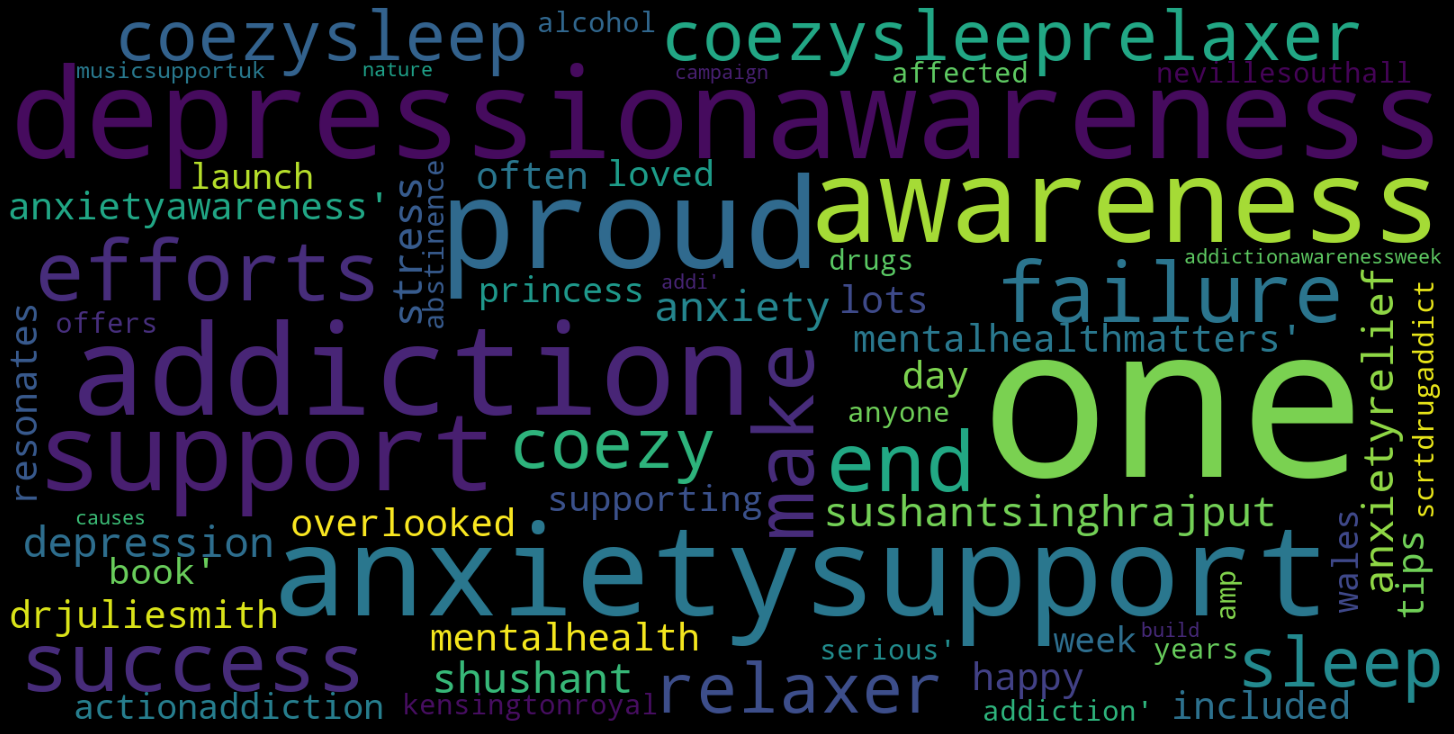

In [ ]:
print_wc(str(text))

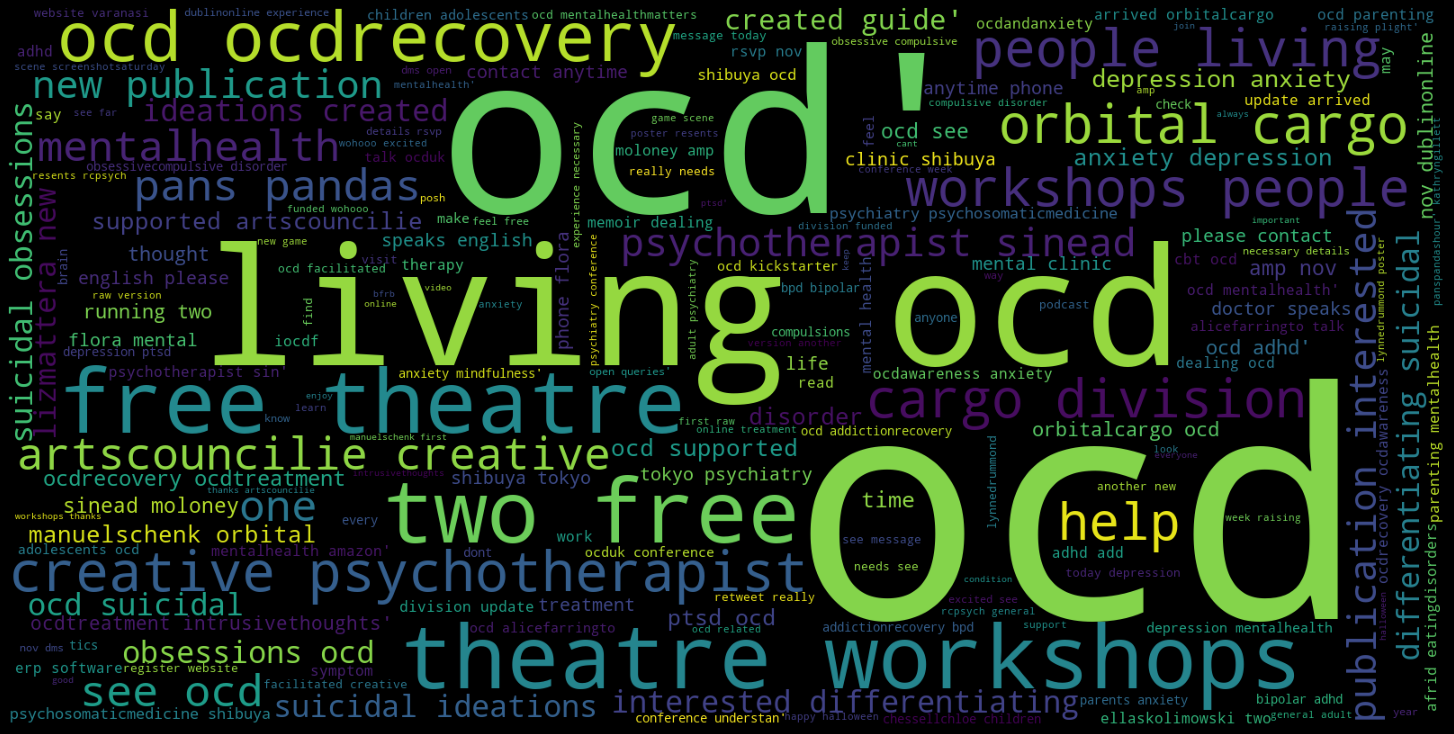

In [ ]:
print_wc(str(text_ocd))

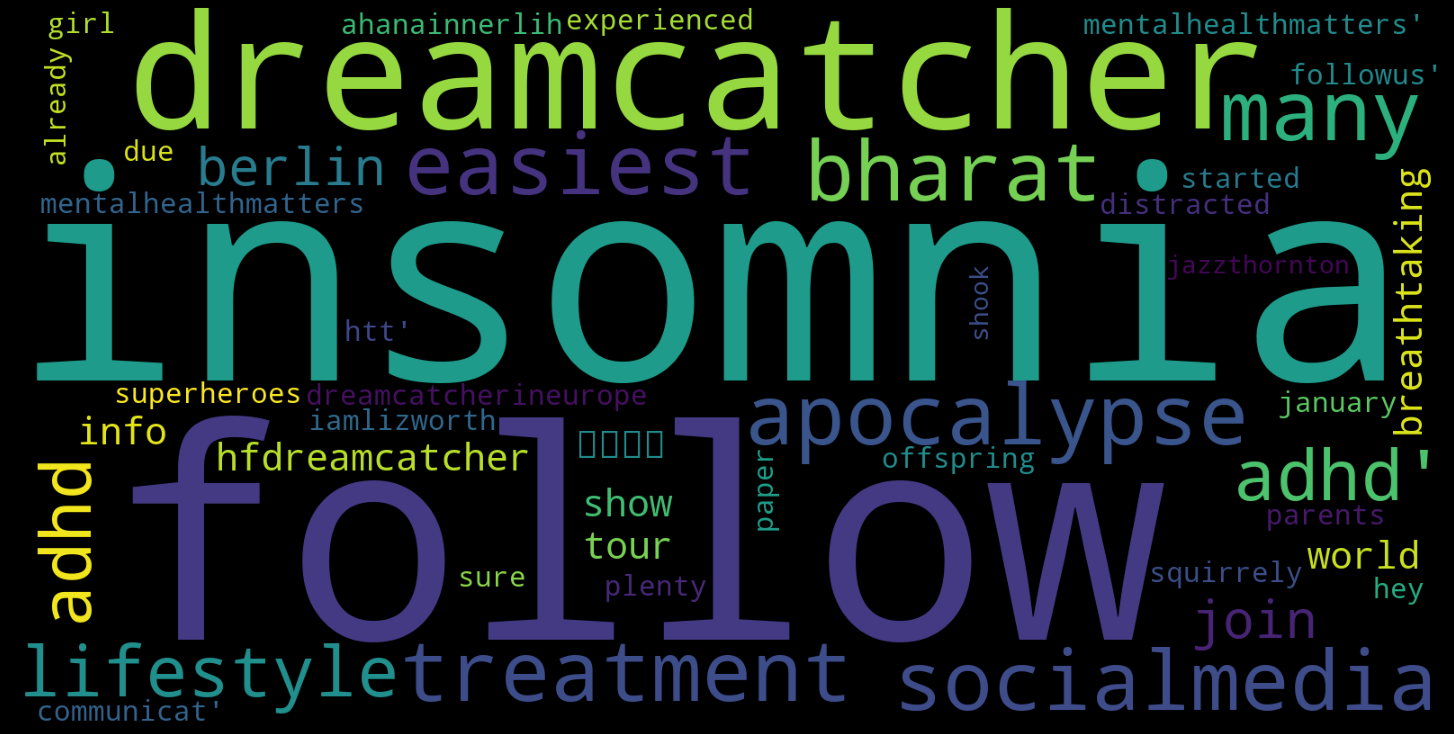

In [ ]:
print_wc(str(text_adhd))